In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("training_data.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
PatientID    1000 non-null int64
Resp         1000 non-null int64
PR Seq       920 non-null object
RT Seq       1000 non-null object
VL-t0        1000 non-null float64
CD4-t0       1000 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
None


In [3]:
#Write as dataframe
def strip_kmeres(k, seq, store):
	for i in range(len(seq)- k + 1):
		kmer = seq[i:i+k]
		if kmer not in store:
			store[kmer] = 1 
		else:
			store[kmer] += 1
	return

In [4]:
#2
PR_yes = dict()
PR_no = dict()
#3
RT_yes = dict()
RT_no = dict()

In [5]:
#Get RT and PR from those
for index, row in dataset[(dataset["Resp"] == 1)].iterrows():
    strip_kmeres(3, str(row[2]), PR_yes)
    strip_kmeres(3, str(row[3]), RT_yes)
for index, row in dataset[(dataset["Resp"] == 0)].iterrows():
    strip_kmeres(3, str(row[2]), PR_no)
    strip_kmeres(3, str(row[3]), RT_no)

In [57]:
def filter_kmers(data_dict):    
    #smash into dataframe:
    #merge by kmeres
    #Проверить на состав |
    kmers = []
    freqency = []

    for k,v in sorted(data_dict.items()):
        if re.match('[ATGC]{3}', k) != None:
            kmers.append(k)
            freqency.append(v)
            
    return kmers, freqency

def plot_specter(data_dict):
    kmers, frequency = filter_kmers(data_dict)
    
    kmer_info = zip(kmers, frequency)
    kmer_info_sorted = sorted(kmer_info, key = lambda x: x[1])
    
    kmeres_sorted = [k[0] for k in kmer_info_sorted]
    freq_sorted = [k[1] for k in kmer_info_sorted]
    
    kmer_sum = sum(freq_sorted)
    
    freq_sorted = [f/kmer_sum for f in freq_sorted]
    
    fig = plt.figure(figsize=(20,10))
    sns.barplot(x = kmeres_sorted, y = freq_sorted)
    plt.show()
    
    return list(zip(kmeres_sorted, freq_sorted))

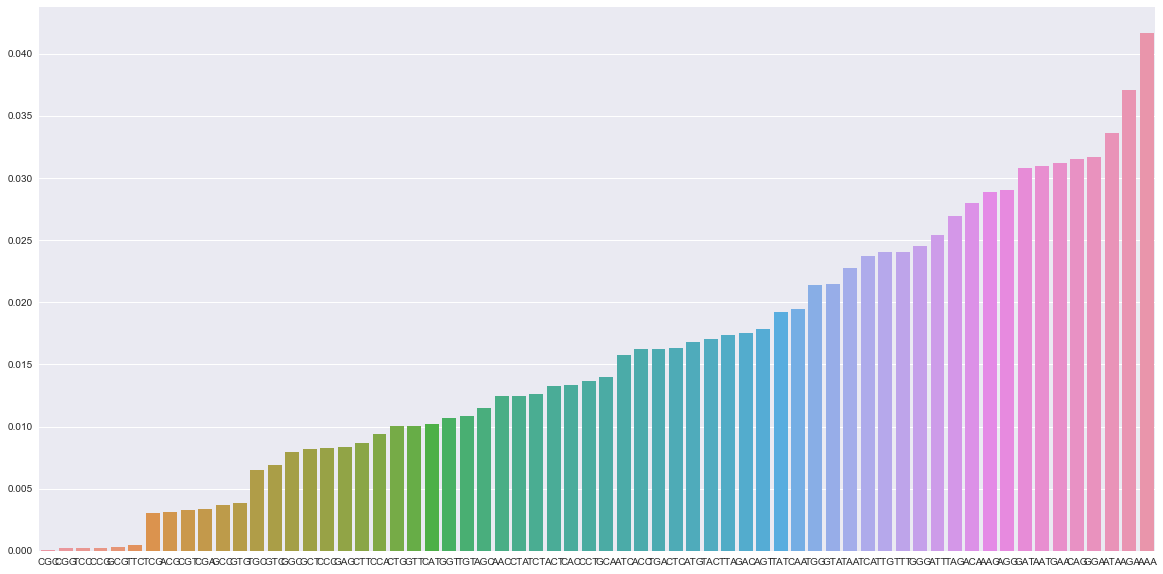

In [58]:
yes_freq = plot_specter(PR_yes)

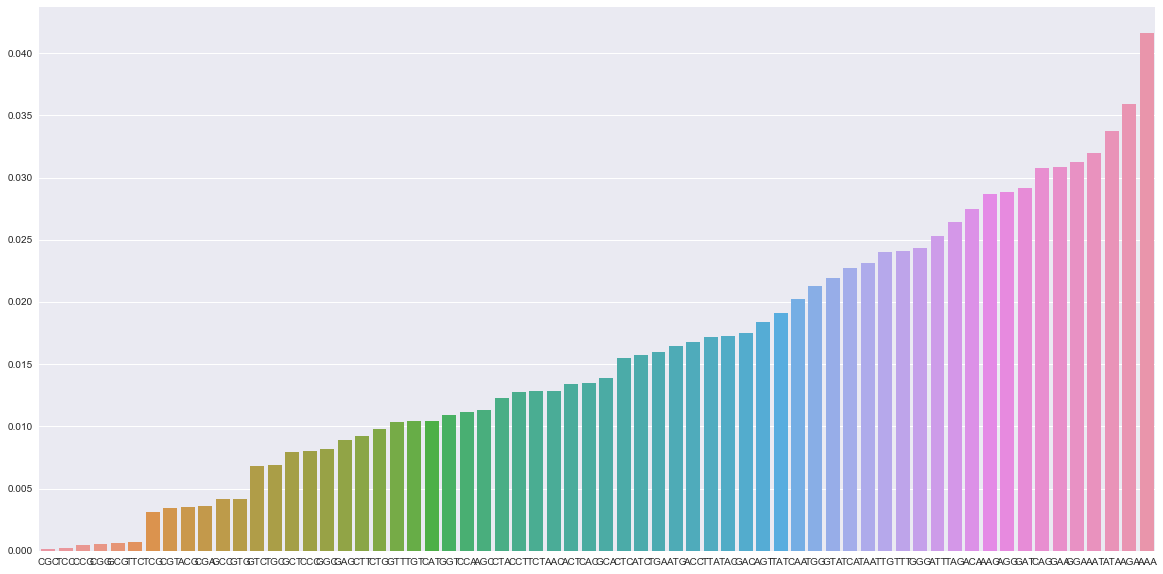

In [59]:
no_freq = plot_specter(PR_no)

In [60]:
yes_freq[-10:]

[('AAG', 0.02890577737447066),
 ('AGG', 0.02905701754385965),
 ('GAT', 0.030796279491833032),
 ('AAT', 0.03094751966122202),
 ('GAA', 0.031212189957652754),
 ('CAG', 0.03151467029643073),
 ('GGA', 0.03166591046581972),
 ('ATA', 0.03363203266787659),
 ('AGA', 0.03709165154264973),
 ('AAA', 0.041666666666666664)]

In [61]:
no_freq[-10:]

[('AAG', 0.028714867074886852),
 ('AGG', 0.028843228235652076),
 ('GAT', 0.029137983493705548),
 ('CAG', 0.030759137412999658),
 ('GAA', 0.030839957403111094),
 ('GGA', 0.031215532651276006),
 ('AAT', 0.03199996196706348),
 ('ATA', 0.03371144411059978),
 ('AGA', 0.035898337960673946),
 ('AAA', 0.041608032556193664)]